# </br>LIMPIEZA DE DATOS HOMICIDIO HECHOS


# 1. El problema del proyecto

El Observatorio de Movilidad y Seguridad Vial (OMSV), donde trabajo, como centro de estudios bajo la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, me ha encargado la elaboración de un proyecto de análisis de datos. El objetivo es generar información que permita a las autoridades locales tomar medidas para reducir la cantidad de víctimas fatales en accidentes de tránsito. Para ello, me han proporcionado un conjunto de datos en formato xlsx que detalla los homicidios en siniestros viales ocurridos en la Ciudad de Buenos Aires entre 2016 y 2021. Este conjunto de datos consta de dos hojas, "hechos" y "víctimas", y también incluye dos hojas adicionales con diccionarios de datos para facilitar la comprensión de la información proporcionada.

# 2. los Set de datos

La información recolectada por el OMSV se encuentran el archivo `homicidios.xlsx`

* `homicidios.xlsx` - Hoja: HECHOS. Cuenta con 21 Columnas y 696 filas
Cada registro contiene 21 características o columnas.  Las columnas son:

1. "ID": identificador unico del siniestro (String)
2. "N_VICTIMAS": cantidad de víctimas (númerico)
3. "FECHA": fecha en formato dd/mm/aaaa (numérico)
4. "AAAA":	año (numérico)
5. "MM": mes (numérico)
6. "DD": día del mes (numérico)
7. "HORA": 	hora del siniestro (String)
8. "HH": franja horaria entera (String)
9. "LUGAR_DEL_HECHO": Dirección del hecho (string)
10. "TIPO_DE_CALLE"	Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
11. "Calle":	nombre de la arteria donde se produjo el hecho
12. "Altura":	altura de la arteria donde se produjo el hecho
13. "Cruce":	cruce en caso de que sea una encrucijada
14. "Dirección Normalizada":	direccion en formato normalizado USIG
15. "COMUNA":	Comuna de la ciudad (1 a 15)
16. "XY (CABA)":	geocodificación plana
17. "pos x":	longitud con separador punto. WGS84
18. "pos y":	latitud con separador punto. WGS84
19. "PARTICIPANTES":	conjunción de víctima y acusado
20. "VICTIMA":	Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a. Clasificación agregada del tipo de vehículos.
21. "ACUSADO":	Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal



* `lesiones.xlsx`- Hoja VICTIMAS: Cuenta con  9 Columnas y 27605 filas 
Cada registro contiene 9 características o columnas.  Las columnas son:

1. "ID hecho":	identificador unico del siniestro
2. "AÑO":	año
3. "MES":	mes
4. "DIA":	día del mes
5. "FECHA": 	fecha en formato dd/mm/aaaa
6. "VEHICULO_VICTIMA":	Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a
7. "SEXO":	Sexo de la víctima según registro policial
8. "EDAD_VICTIMA":	Edad en años enterios de la víctima en registro policial
9. "GRAVEDAD":	Nivel máximo conocido de gravedad de la lesión de la víctima del siniestro en función del tiempo de hospitalización





# 3. Una primera mirada al dataset

In [34]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Revisando el archivo de homicidios 

In [35]:

# Nombre del archivo Excel
archivo_excel = 'data/homicidios.xlsx'

# Leer el archivo Excel y cargarlo en un DataFrame
df_homicidios_H = pd.read_excel(archivo_excel, sheet_name='HECHOS')

# Suponiendo que 'df' es tu DataFrame
dimensiones = df_homicidios_H.shape

# Obtener el número de filas y columnas
num_filas = dimensiones[0]
num_columnas = dimensiones[1]

# Imprimir las dimensiones
print("Número de filas del Dataset homicidios HECHOS:", num_filas)
print("Número de columnas del Dataset homicidios HECHOS:", num_columnas)
# Vemos el encabezado con pocas filas
df_homicidios_H.head()



Número de filas del Dataset homicidios HECHOS: 696
Número de columnas del Dataset homicidios HECHOS: 21


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [36]:
# Veamos las variables categóricas y las numéricas
df_homicidios_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Realizando una inspección previa de la hoja :HECHOS en el archivo lesiones.xlsx

In [37]:
# Nombre del archivo Excel
archivo_excel = 'lesiones.xlsx'

# Leer el archivo Excel y cargarlo en un DataFrame
df_lesiones_H = pd.read_excel(archivo_excel, sheet_name='HECHOS')

# Suponiendo que 'df' es tu DataFrame
dimensiones = df_lesiones_H.shape

# Obtener el número de filas y columnas
num_filas = dimensiones[0]
num_columnas = dimensiones[1]

# Imprimir las dimensiones
print("Número de filas del Dataset homicidios HECHOS:", num_filas)
print("Número de columnas del Dataset homicidios HECHOS:", num_columnas)
# Vemos el encabezado con pocas filas
df_lesiones_H.head()


Número de filas del Dataset homicidios HECHOS: 23785
Número de columnas del Dataset homicidios HECHOS: 27


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


Realizando una inspección previa de la hoja :VICTIMAS en el archivo lesiones.xlsx

In [38]:
# Nombre del archivo Excel
archivo_excel = 'lesiones.xlsx'

# Leer el archivo Excel y cargarlo en un DataFrame
df_lesiones_V = pd.read_excel(archivo_excel, sheet_name='VICTIMAS')

# Suponiendo que 'df' es tu DataFrame
dimensiones = df_lesiones_V.shape

# Obtener el número de filas y columnas
num_filas = dimensiones[0]
num_columnas = dimensiones[1]

# Imprimir las dimensiones
print("Número de filas del Dataset homicidios VICTIMAS:", num_filas)
print("Número de columnas del Dataset homicidios VICTIMAS:", num_columnas)
# Vemos el encabezado con pocas filas
df_lesiones_V.head()


Número de filas del Dataset homicidios VICTIMAS: 27605
Número de columnas del Dataset homicidios VICTIMAS: 9


,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes SET HOMICIDIOS (HECHOS)

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 596. Sin embargo columnas como "Altura", "Cruce" tienen varios registros con NaN. Se eliminan esas columnas 

Se eliminan los pocos registros (7) de la columna "Dirección Normalizada" y se procede a configurar el dataset de acuerdo a la dimensión de esta columna 588 registros  

In [39]:
df_homicidios_H.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [40]:
df_homicidios_H[["Altura", "Calle", "Dirección Normalizada", "Cruce"]][:5]

,Altura,Calle,Dirección Normalizada,Cruce
0,NaN,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...","FERNANDEZ DE LA CRUZ, F., GRAL. AV."
1,NaN,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",DE LOS CORRALES AV.
2,2034.0,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,NaN
3,NaN,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.","VILLEGAS, CONRADO, GRAL."
4,NaN,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.","SAENZ PE?A, LUIS, PRES."


Tras examinar datos nulos, que representan el 5,1% del dataset; distribuidos en tres columnas **`Altura`**, **`Dirección Normalizada`**, **`Cruce`** y **`Calle`**. 
- Para el caso de **`Calle`** tiene un solo dato nulo.
- Para el caso de  **`Dirección Normalizada`** 8 nulos. 
- Para el caso de **`Cruce`** tiene 171 nulos, siendo el 24,56% del los datos de la columna.
- Para el caso de **`Altura`** tiene 567 nulos que representan el 81,5% de datos de la columna

Analizando los datos de la `Altura` se procede a eliminarla debido a la gran cantidad de faltantes y no existiendo manera de poder rellenar las colummas; ya que altura se refiere a la numeración de la calle donde se produce el siniestro y la mayoria de los casos se producen en cruces o esquinas.
La columna `Cruce` solo va a tener dato cuando el hecho se porduce en un cruce de calles, por lo que se conserva de esta manera.
La columna `Dirección Normalizada` no tiene posibilidad de completarse con las columnas del dataset; pero contiene solo 1,1% de nulos por lo se conserva de esta manera.

In [41]:
df_homicidios_H.drop(columns=['Altura'],inplace=True)
df_homicidios_H.info()
df_homicidios_H.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Cruce                  525 non-null    object        
 12  Dirección Normalizada  688 non-null    object        
 13  COMUN

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [42]:
df_homicidios_H.duplicated().sum()

0

## 4.2 Transformación

Ante la salida de la info del dataset, se observa que la primera columna con tipo de dato que necesita transformación es `HH`, debido a que se encuentra como objeto y deberia ser númerico.
- Por ello se analizan los datos de la columna
- Se transforman a tipo de dato numérico

In [43]:
df_homicidios_H["HH"].unique()

array([4, 1, 7, 0, 5, 18, 19, 15, 11, 22, 16, 9, 23, 6, 10, 17, 12, 8, 20,
       21, 14, 3, 2, 13, 'SD'], dtype=object)

El campo que contiene SD, no se modifica debido a que en la columna HORA donde tambien debería existir dato, se encuentra SD. Por lo que no podemos calcular un reemplazo. Otra opción sería calcular la mediana de las horas y reemplazarlas pero podria no ser representativo en este caso. Por lo que se define mantenerlo en SD

In [44]:
df_homicidios_H["HH"] = pd.to_numeric(df_homicidios_H["HH"], errors="coerce")
df_homicidios_H["HH"] = df_homicidios_H["HH"].astype("Int64")

Vamos a aplicar filtro booleano que indica qué filas del DataFrame df_homicidios_H tienen posiciones válidas en las columnas 'pos x' y 'pos y'. Las filas que no cumplen con estas condiciones serán seleccionada

In [45]:
# Filtrar filas con posiciones no válidas
import numpy as np
valid_positions = ~(df_homicidios_H['pos x'].str.contains('[^0-9.,-]') | df_homicidios_H['pos y'].str.contains('[^0-9.,-]') | (df_homicidios_H['pos x'] == '.') | (df_homicidios_H['pos y'] == '.'))

# Establecer posiciones no válidas en NaN
df_homicidios_H.loc[~valid_positions, ['pos x', 'pos y']] = np.nan

# Convertir las cadenas a tipo numérico (float)
df_homicidios_H['pos x'] = df_homicidios_H['pos x'].str.replace(',', '.').astype(float)
df_homicidios_H['pos y'] = df_homicidios_H['pos y'].str.replace(',', '.').astype(float)

In [46]:
df_homicidios_H.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO


La columna `XY (CABA)` posee coordenadas para poder ubicar en un mapa , las extraemos para poder utilizar

In [47]:
import re
# Función para extraer las coordenadas CABA
# Esta función toma un argumento texto, que es el texto de entrada del cual se intentarán extraer las coordenadas
# Utiliza una expresión regular (re.findall) para buscar todas las coincidencias de números decimales (que tienen un punto como separador decimal) en el texto. Estas coincidencias se almacenan en la lista coordenadas.
# return float(coordenadas[0]), float(coordenadas[1]): Si se encontraron dos coordenadas, se convierten en números de punto flotante (float) y se devuelven como una tupla de dos valores.
# Luego, se aplica esta función a la columna 'XY (CABA)' de df_siniestros utilizando el método .map(). Esto se hace para cada fila de la columna, y los resultados se almacenan en dos nuevas columnas, 'coordenada_x' y 'coordenada_y', utilizando zip(*...).

def extraer_coordenadas(texto):
    # Utilizamos una expresión regular para extraer las coordenadas
    coordenadas = re.findall(r'\d+\.\d+', texto)
    if len(coordenadas) == 2:
        return float(coordenadas[0]), float(coordenadas[1])
    else:
        return None, None

# Aplicar la función a la columna 'XY (CABA)'
df_homicidios_H['coordenada_x'], df_homicidios_H['coordenada_y'] = zip(*df_homicidios_H['XY (CABA)'].map(extraer_coordenadas))

# Filtrar los registros que no tienen coordenadas válidas
df_homicidios_H = df_homicidios_H[(df_homicidios_H['coordenada_x'].notnull()) & (df_homicidios_H['coordenada_y'].notnull())]

In [48]:
#Se observan las columnas resultantes
df_homicidios_H.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'coordenada_x', 'coordenada_y'],
      dtype='object')

In [49]:
df_homicidios_H.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,coordenada_x,coordenada_y
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878


En la columna 'Comuna' tenemos una numeracion del 1 al 15. Esta numeración identifica a cada una de las divisiones comunales de la ciudad autónoma de Buenos Aires.

Para agregar valor al dataset, agregaremos la descripción de cada una de las comunas, con los Barrios que la conforman.

Para eso utilizaremos el dataset 'comunas' importado junto al dataset `homicidios`. Este dataset fue descargado del siguiente sitio web: https://buenosaires.gob.ar/comunas

In [50]:
comunas= pd.read_excel("data/comunas.xlsx")

#Se realiza el merge a través de la columna en comun `Comuna` y nos va a quedar anexada la columna `Barrios`

df_homicidios_H=df_homicidios_H.merge(comunas, on="COMUNA", how="left")

#Modifico las mayúsculas por minúsculas
df_homicidios_H=df_homicidios_H.rename(columns={
    "BARRIOS": "Barrios"
})

In [51]:
df_homicidios_H.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,coordenada_x,coordenada_y,Barrios
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,LINIERS - MATADEROS - PARQUE AVELLANEDA
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...


Las colummas tienen nombres en mayúsculas y también en minúsculas. Se estandarizan a modo de buena práctica

In [52]:
#Cambio la primer letra a mayúscula
df_homicidios_H.columns = [x.capitalize() for x in df_homicidios_H.columns]
# Reemplazo guiones por espacios
df_homicidios_H.columns = df_homicidios_H.columns.str.replace("_", " ")
#Renombra columnas 
df_homicidios_H= df_homicidios_H.rename(columns={"N victimas": "Num víctimas",
                                            "Aaaa": "Año",
                                            "Mm":"Mes",
                                            "Dd": "Día",
                                            "Hora": "Hora completa",
                                            "Hh": "Hora"}) 

df_homicidios_H.columns

Index(['Id', 'Num víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora completa',
       'Hora', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Xy (caba)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Coordenada x', 'Coordenada y',
       'Barrios'],
      dtype='object')

Al analizar los datos de la columna `Día` se muestra solo el numero del día y no el nombre correspondiente por lo que se crea la columna `Día semana` donde se corresponde cada fecha con un dia de la semana para poder analizar luego como se relacionan los siniestros con los dias de la semana

In [53]:
#Consulto la columna Día
df_homicidios_H.Día

0       1
1       2
2       3
3      10
4      21
       ..
677    13
678    20
679    30
680    15
681    18
Name: Día, Length: 682, dtype: int64

In [54]:
#Creo una columna nueva `Día semana` que contenga el nombre del día de la semana
df_homicidios_H['Día semana'] = df_homicidios_H['Fecha'].dt.strftime('%A')

#Creo un diccionario para modificar a español los nombres de los dás de la semana y lo aplico a la columna nueva
dic={  'Friday':'Viernes',
       'Saturday': 'Sabado',
       'Sunday': 'Domingo',  
       'Thursday': 'Jueves',
        'Monday': 'Lunes',
        'Wednesday': 'Miercoles',
       'Tuesday': 'Martes'}
df_homicidios_H['Día semana'] =df_homicidios_H['Día semana'].replace(dic)

In [55]:
df_homicidios_H.head(3)

,Id,Num víctimas,Fecha,Año,Mes,Día,Hora completa,Hora,Lugar del hecho,Tipo de calle,...,Xy (caba),Pos x,Pos y,Participantes,Victima,Acusado,Coordenada x,Coordenada y,Barrios,Día semana
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,Viernes
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,LINIERS - MATADEROS - PARQUE AVELLANEDA,Sabado
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,Domingo


La columna `Comuna` se modifica agregando el termino Comuna antes del número, a fin de lograr una variable categórica que me simplifique el análisis

In [56]:
df_homicidios_H["Comuna"].unique()

array([ 8,  9,  1, 11, 15,  4,  7, 12,  3, 13, 14, 10,  6,  2,  5],
      dtype=int64)

In [57]:
#Agrego la palabra Comuna delante del dato numérico
#se aplica la función lambda a cada fila del dataframe 
df_homicidios_H["Comuna"] = df_homicidios_H.apply(lambda x: "Comuna "+str(x["Comuna"]), axis=1)

In [58]:
df_homicidios_H["Comuna"].unique()

array(['Comuna 8', 'Comuna 9', 'Comuna 1', 'Comuna 11', 'Comuna 15',
       'Comuna 4', 'Comuna 7', 'Comuna 12', 'Comuna 3', 'Comuna 13',
       'Comuna 14', 'Comuna 10', 'Comuna 6', 'Comuna 2', 'Comuna 5'],
      dtype=object)

In [59]:
df_homicidios_H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 681
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     682 non-null    object        
 1   Num víctimas           682 non-null    int64         
 2   Fecha                  682 non-null    datetime64[ns]
 3   Año                    682 non-null    int64         
 4   Mes                    682 non-null    int64         
 5   Día                    682 non-null    int64         
 6   Hora completa          682 non-null    object        
 7   Hora                   681 non-null    Int64         
 8   Lugar del hecho        682 non-null    object        
 9   Tipo de calle          682 non-null    object        
 10  Calle                  682 non-null    object        
 11  Cruce                  525 non-null    object        
 12  Dirección normalizada  682 non-null    object        
 13  Comun

## 4.3 Columnas irrelevantes SET HOMICIDIOS (HECHOS)

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**. 
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [60]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Lugar del hecho', 'Tipo de calle', 'Calle','Cruce', 'Comuna','Participantes', 'Victima', 'Acusado' ]
for col in cols_cat:
  print(f'Columna {col}: {df_homicidios_H[col].nunique()} subniveles')

Columna Lugar del hecho: 669 subniveles
Columna Tipo de calle: 4 subniveles
Columna Calle: 278 subniveles
Columna Cruce: 317 subniveles
Columna Comuna: 15 subniveles
Columna Participantes: 41 subniveles
Columna Victima: 10 subniveles
Columna Acusado: 10 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [61]:
df_homicidios_H.describe()

,Num víctimas,Año,Mes,Día,Hora,Pos x,Pos y,Coordenada x,Coordenada y
count,682.000000,682.000000,682.000000,682.000000,681.000000,682.000000,682.000000,682.000000,682.000000
mean,1.029326,2018.205279,6.693548,15.926686,11.678414,-58.441592,-34.619537,101990.962338,101078.485362
std,0.177325,1.679653,3.579791,8.626900,6.661409,0.046128,0.035288,4230.329590,3914.622909
min,1.000000,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250,93889.867899,91571.233073
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,-58.476297,-34.643621,98807.750321,98407.889777
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,-58.444513,-34.622866,101721.590022,100708.189095
75%,1.000000,2020.000000,10.000000,23.000000,17.000000,-58.401892,-34.596500,105630.884244,103634.991834
max,3.000000,2021.000000,12.000000,31.000000,23.000000,-58.356082,-34.534654,109831.098614,110496.053085


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 4.4 Filas repetidas SET HOMICIDIOS (HECHOS)

In [62]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_homicidios_H.shape}')
df_homicidios_H.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_homicidios_H.shape}')

Tamaño del set antes de eliminar las filas repetidas: (682, 24)
Tamaño del set después de eliminar las filas repetidas: (682, 24)


## 4.5 *Outliers* en las variables numéricas SET HOMICIDIOS (HECHOS)

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

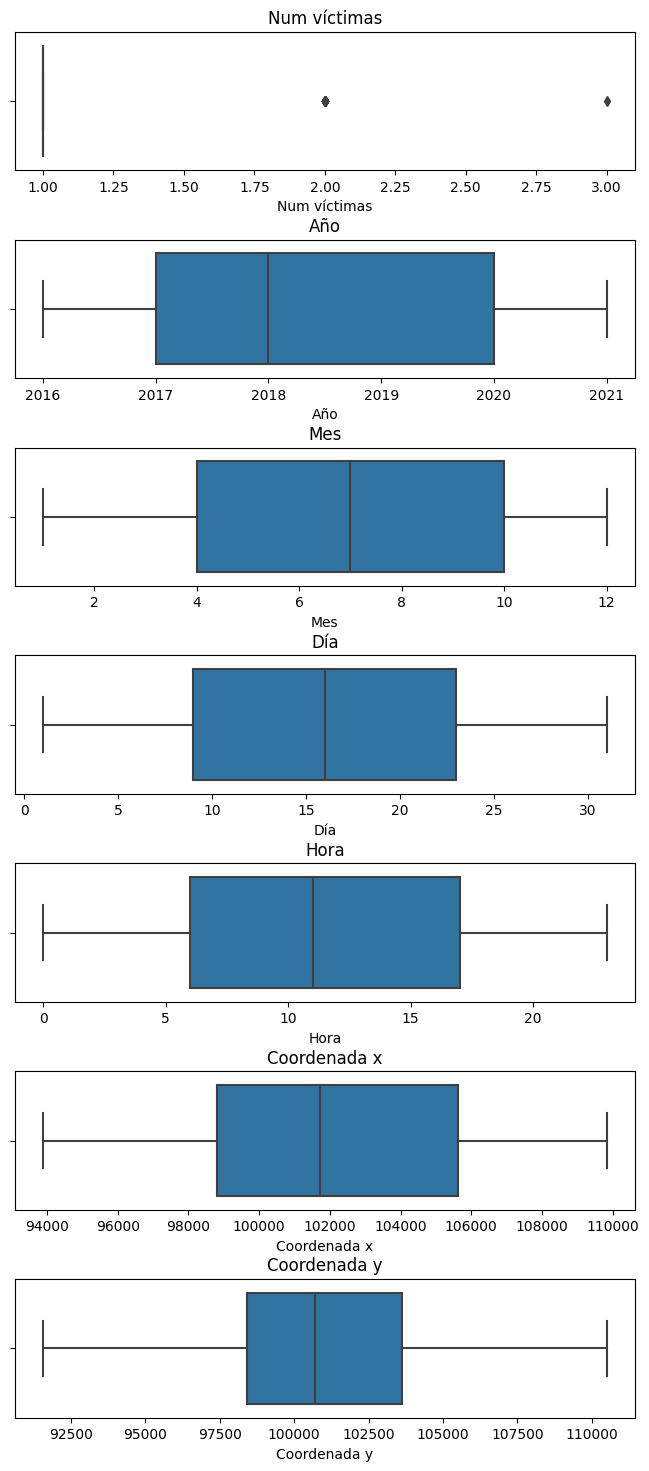

In [63]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Num víctimas','Año', 'Mes', 'Día', 'Hora', 'Coordenada x','Coordenada y', ]

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,18))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_homicidios_H, ax=ax[i])
    ax[i].set_title(col)

# 4.6 Errores tipográficos en variables categóricas SET HOMICIDIOS (HECHOS)
En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

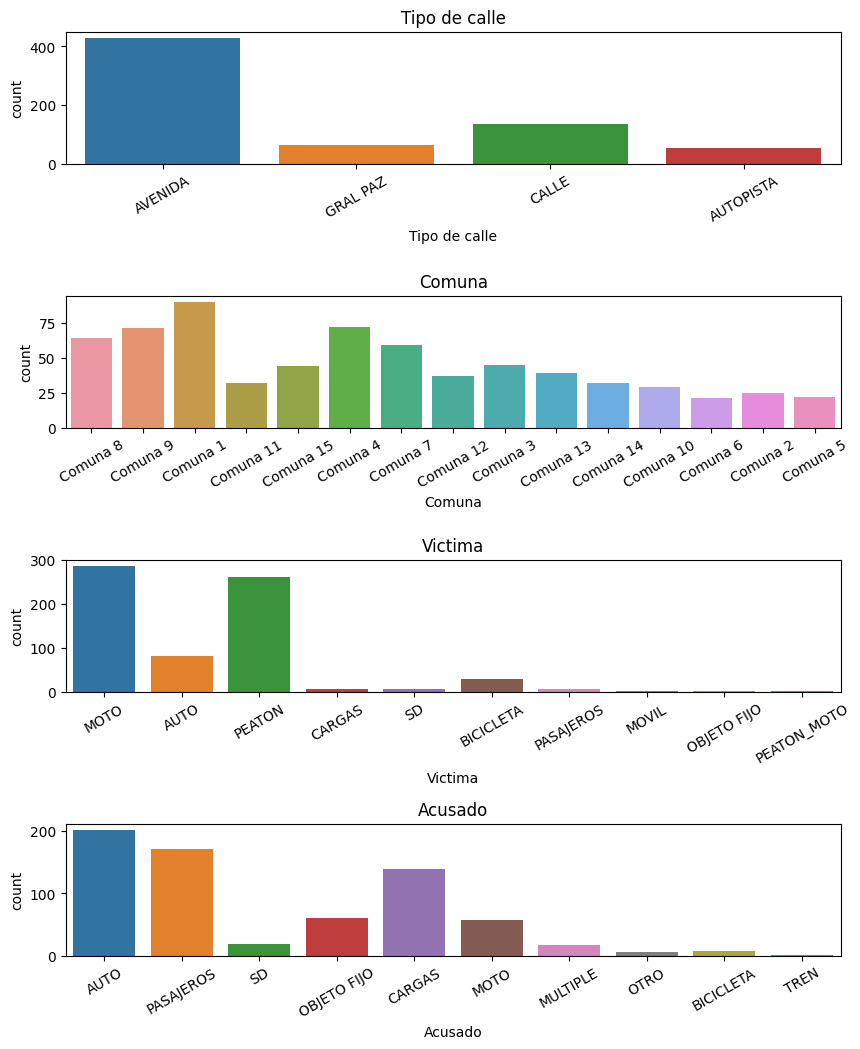

In [64]:
# Graficar los subniveles de cada variable categórica
cols_cat = [ 'Tipo de calle', 'Comuna', 'Victima', 'Acusado']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,12))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df_homicidios_H, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 696 registros y 21 columnas. El dataset resultante tiene 687 filas (9 menos) y 24 columnas.

El set de datos ya está listo para unificar con la pestaña HOMICIDIOS_VICTIMAS.

In [65]:
# Guardar el DataFrame como un archivo CSV sin incluir el índice
df_homicidios_H.to_csv('homicidios_H.csv', index=False)